# stage2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

## 1. 데이터로드

In [2]:
df = pd.read_csv('./data/house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


## 2. 데이터 전처리

In [5]:
house_data = df.drop(['id', 'date'], axis=1)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


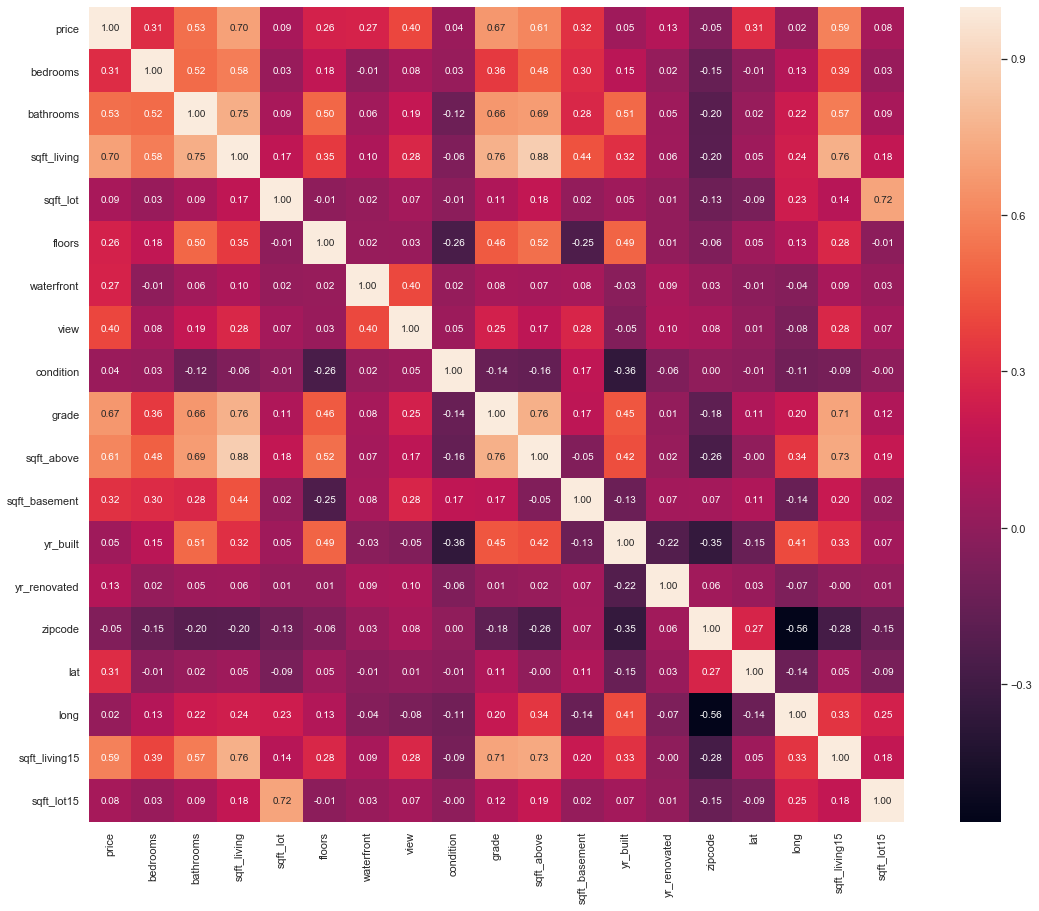

In [6]:
plt.figure(figsize=(20, 15))
sns.heatmap(house_data.corr(), annot=True, fmt='.2f', square=True)
plt.show()

In [7]:
# sns.catplot(data=house_data, x='bathrooms', y='price', aspect=2)
# plt.show()

In [8]:
# sns.catplot(data=house_data, x='bathrooms', y='price', aspect=2).set(ylim=(0, 500000))
# plt.show()

In [9]:
# sns.catplot(data=house_data, x='sqft_living', y='price', aspect=3)
# plt.show()

## 3. 예측하기

In [10]:
from sklearn.model_selection import train_test_split

input_data = house_data.drop(['price'], axis=1)
target_data = house_data[['price']]

input_data.shape

(21613, 18)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2)
x_test.shape

(4323, 18)

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)
x_valid.shape

(3458, 18)

In [13]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8322,3,1.50,1060,6232,1.0,0,0,4,7,1060,0,1968,0,98118,47.5329,-122.271,1120,5379
14484,3,1.75,1340,63597,1.0,0,0,4,7,1340,0,1963,0,98038,47.4379,-122.011,1950,87120
4842,5,2.00,2740,8230,1.5,0,0,3,7,2210,530,1962,0,98155,47.7352,-122.297,2130,8232
13275,4,2.50,2120,9163,1.0,0,0,4,8,1450,670,1961,0,98006,47.5551,-122.172,2120,9166
4626,4,2.50,4240,43995,2.0,0,0,3,10,4240,0,1989,0,98075,47.6008,-122.044,3720,59522


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print('train set accuracy :', lr.score(x_train, y_train))
print('valid set accuracy :', lr.score(x_valid, y_valid))

train set accuracy : 0.696288997118276
valid set accuracy : 0.7160378849066471


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(x_train, y_train)

print('train set accuracy :', model.score(x_train, y_train))
print('valid set accuracy :', model.score(x_valid, y_valid))

train set accuracy : 0.836162795030191
valid set accuracy : 0.8024807019124489


In [16]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

print('train set accuracy :', tree.score(x_train, y_train))
print('valid set accuracy :', tree.score(x_valid, y_valid))

train set accuracy : 0.9995716602195089
valid set accuracy : 0.7280447403483241


In [17]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(x_train, y_train)

print('train set accuracy :', forest.score(x_train, y_train))
print('valid set accuracy :', forest.score(x_valid, y_valid))

C:\Users\round\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\round\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


train set accuracy : 0.9709437121295121
valid set accuracy : 0.8754135348133135


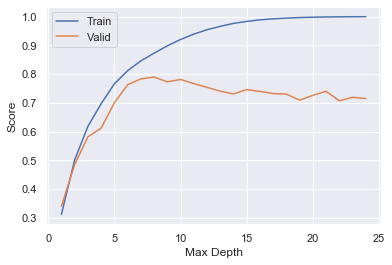

In [18]:
train_score = []
valid_score = []

depth_range = range(1, 25)
for depth in depth_range:
    tree = DecisionTreeRegressor(max_depth = depth)
    tree.fit(x_train, y_train)

    train_score.append(tree.score(x_train, y_train))
    valid_score.append(tree.score(x_valid, y_valid))

plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)
plt.legend(['Train', 'Valid'])
plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()